# **Neural Network without Python Library** 
*A detailed description of NN, including the maths* &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; ~Nitin Rohit

## Introduction 
I was always puzzled about the internal working of neural networks and couln't just accept to use the inbuilt libraries as such without understanding the core knowledge of neural network. Sometime later I got a better grasp on it after watching the Machine Learing course by Andrew NG(which is also available in youtube), a great course to start ML. So, thought to share it to all.

This notebook is made for my own understanding and for other too get a better grip in neural networks and its application. I will be using a two layered neural network for this task and will be using the MNIST dataset available in Kaggle. In this notebook I'll be explaining about every mathematical equation required to understand the working behind it and some links as reference, which will give you a easy time learning the brain of computer(aka NN).

### About the dataset (Modified National Institute of Standards and Technology)
This is one of the most famous dataset of hand written number digits, from zero to nine, used in machine learning for image processing and can be a good start for machine learing enthosiast like me. The size of the images are 28x28 with each pixel value varying between 0 to 255 (from white to black). There are 60,000 examples for training the model and 10,000 examples for testing the accuracy of the model built with each example labelled as one of the digit.

### The algorithm and mathematics
In this code I will be using a two layer neural network which has 784 pixels as input parameters, 10 nodes in first layer and 10 nodes in second layer(also the output layer). Neural network is just multi-layered and multi-node logistic regressin with different activation function. 
So, to the algorithm now. We will be using ReLU as the acivation function for the first layer and softmax for the ouput layer. As the output layer is softmax we will be using cross entopy function, you will understand why when we get to the maths part. The part discussed now was about forward propagation which predicts the ouput for which the values of the weights and bias which should be optimised in accordance to the dataset, which has to done using backward propagation(inverse forward propagation) using gradient decent. Backward propagation is the name given to gradient decent done to all the weights and bias, as the output values of one layer become input for the next layer and using chain rule while applying differentiation we get to see that the variable depends on a backward manner hence the name "Backward Propagation". We have to do the back propagation multiple time so that we get the minimum accuracy to call it a ML algorithm.
So lets sum up the things you should know before going any further. 
1. Linear algebra(Basics)
2. Differentiation(chain rule)
3. Einstein notation(its not that difficult as it sounds)
4. python(numpy) 

That's it? I can't believe it, am I already a data scientist. NO! We havn't done the coding part yet.

### THE code 

First we have to import the required libraries<br>
Pandas just to read the csv files, Numpy for manipulating the arrayed data and Matplotlib for the visualisation part.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now we have to bring the csv file to the code and then see if we have imported the correct file by viewing the initial datapoints

In [2]:
data=pd.read_csv('mnist_train.csv')
print(data.head(5))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


We can see that the imported file is correct and we can now move to the next step where we have to change the data to numpy array and get the dimensions of the dataset.

In [3]:
data=np.array(data)
m,n = data.shape

Now we have to seperate the pixel's values(parameters) and labels so that we can use them as input values and comparing the correct value after the prediction is made by our model, respectively. After getting the input values we have to normalise so that it can be a better dataset as it gets contained between 0-1 and easy to manipulate(see data pre-processing for better understanding).

In [4]:
data=data.T
Y_train = data[0]
X_train = data[1:n]
X_train = X_train / 255.

Now lets see how the data has been converted and also the transpose has been taken due to the convention and nothing more, which will be used while explaining the maths part.

In [5]:
print(Y_train)
print(X_train)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


So the data processing has been done properly and now lets move on to the next part which is Forward propagation, before that we have to intialise the weights and bias with some ramdom values(between -0.5 to 0.5). 

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

The dimension of the first weight vector is 10x784 because there are 10 nodes in next layer and 784 input parameters, and the first bias is 10x1 as its the constant that is been added to each of the next layer nodes(10 here). We can give similar explaination to the next weights and bias to get their dimensions as given above.

Next, we have to define the activation functions which are ReLU and softmax.

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

The ReLU function returns the same value if the input is positive else returns zero. The functions can be written as above, 'cause the max(x,0) is ReLU function which can be visualised from the graph.<br>
The softmax fucntion just takes the probabilty after each value is raised exponentially. The np.exp does the exponential part and the sum fucntions just adds all the term in the array, later just calculating the probability.

As the functions are defined, now we have to just use them in the forward propagation as following.

**The working of forward propagation in mathematics:**<br>
$ Z_1=W_1*X^T+b_1 $<br>
$ A_1=ReLU(Z_1) $<br>
$ Z_2=W_2*A_1+b_2 $<br>
$ A_2=softmax(Z_2) $<br><br>
where $X$ is the input matrix and $A_2$ is the output matrix. This is just the definition of neural network where we are taking the linear combination of the nodes and passing it through a non linear function. This is a two layer neural network, so there are two such steps involved, if one has to extend this to multiple layer we just have to follow this rule like an induction. Then we have to optimise these weights and bias such that the output matches the desired output. Intially the transpose of the input matrix is taken because the features had to be multiplied with the weights and convention is to mulitple weights by the input matrix, hence the transpose is taken.

In [8]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

Now to the hardest part-**BACK PROPAGATION**<br>
We have to define some function like derivative of ReLU and one hot:<br>
der_ReLU is just the derivative of ReLU and one hot just creates an 10x1 array which has one in the correct label and rest are zeros.

In [9]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #creates array of zeros with dimension (number of samples)x10(=category)
    one_hot_Y[np.arange(Y.size), Y] = 1         #arange works like loop here and fills the correct label as one using Y
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

The value of ReLU_deriv is zero for negative values as it is constant and one for positive values as it is same as input<br>
The one hot just creates a array of one and zeros as exaplained above.

I'll be explaining each line of code here, as it is the most confusing part, with the mathematical equations and wordings. I would suggest you to understand the maths part as it is the basis of NN and will help to apply them later efficiently.

In [10]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    I=np.ones((m,1))
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * dZ2.dot(I)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * dZ1.dot(I)
    return dW1, db1, dW2, db2

**The working of backward propagation in mathematics:**<br>
The cost function used here is negative logarithm of output of the correct label which should be enough as it is probability of all the classification. The value shoots to infinity if the probability is zero to the correct label and tends to zero if probability is one. So now lets write down the values of $ Z_1,Z_2,A_1,A_2 $ in einstein notation. After that we will write the cost function in terms of einstein notation and differentiate to use the gradient decent.<br><br>
$$ Cost=-log(F) $$ where F is the probability of correct label<br>
einstein notation is just a notation to write the summation of series in short without summation sign. So, we have to understand the limits of the variable and we can understand there is a summation if same variable comes twice.<br>
$$ \sum_{n=1}^N a_ix^i=a_ix^i\,\,(einstein\,\,notation) $$<br>
Now we have to follow some rules so that we don't get confused while understading the mathematics. So, the capital letters will indicate the weights and small letters the bias, for bias there will only one subscript but for weights there will be two (right one indicating the variables from previous layer and left one the node in current layer). We will use letter n and m for first and second layer respectively. So $ _{j}N_i $ is a weight of second layer with  jth variable of ith node.<br>
Now we write down the matrices in these form:<br>
$$ Z_1=(_{j}M_i x_i+m_i) $$
$$ A_1=ReLU(_{j}M_i x_i+m_i) $$ this is the value for a jth node in first layer. Similarly we get,<br>
$$ Z_2=(_kN_jReLU(_{j}M_i x_i+m_i)+n_j) $$
$$ A_2=\delta((_kN_jReLU(_{j}M_i x_i+m_i)+n_j)) $$ ,here **delta** is the softmax function<br>
Now we just have to differentiate the cost function and write down it in matrix form. But there is a catch, the differentiatoin is not so easy.<br>
We will first find the value of this term $ \frac{\partial F}{\partial _{k_0}N_{j_0}} $ and use chain rule to find the derivative of the cost fucntion, we have to do the same for the bias and for the first layer weights and bias.<br>
Let for example assume that the correct label is three. Then our  F from cost function would look something like this.
$$ F=\frac{e^{(_3N_jReLU(_{j}M_i x_i+m_i)+n_j)}}{\sum_{k=1}^{10} e^{(_kN_jReLU(_{j}M_i x_i+m_i)+n_j)}} $$<br>

Now if we take differentiation with a weight that belong to the third node then that term will be there in numerator as well as denominator.
$$ F=\frac{e^{(_3N_jReLU(_{j}M_i x_i+m_i)+n_j)}}{\sum_{k=1}^{10} e^{(_kN_jReLU(_{j}M_i x_i+m_i)+n_j)}}=\frac{1}{1+pe^{q _{k_0}N_{j_0}}} $$<br>
the LHS can be written as in RHS by dividing F with Numerator in numberator and denominator, where p and q are constant w.r.t to  $_{k_0}N_{j_0}$. If you differentiate this term you will find that it works like sigmoidal function whose derivative is F(1-F). Then the derivative for following weight can be written as:
$$ \frac{\partial F}{\partial _{3}N_{j_0}}=-\frac{1}{F}*F(1-F) $$<br>
but the weight has a coefficient of ReLU so the term will change to $\frac{\partial F}{\partial _{3}N_{j_0}}=ReLU(_{j_0}M_i x_i+m_i)(F-1)$ and F is the softmax value of correct label.<br>Similarly if you do the differentiation of other nodes you will find the derivative to of similar form but instead of minus one it will be minus zero. So we can think of this as the computed output value minus expected value mulitplied with ReLU (this is so beautifull).<br>
So, in genral we can write the derative of second layer as following:$$ \frac{\partial F}{\partial _{k_0}N_{j_0}}=ReLU(_{j_0}M_i x_i+m_i)(\delta_{k_0}-Y) $$ ,where $\delta_{k_0}$ is the output value of kth node.<br>
Similarly for bias of second layer we can write the same expression but without the ReLU part as it has no coefficient. Then we get:$$ \frac{\partial F}{\partial _{k_0}n}=(\delta_{k_0}-Y) $$<br> Now you should have understood why we have created one hot function and subtracted it with the computed output ,and why there is no ReLU term mulitplied with the bias updation. We can follow the same method to find the updation values of first layer which is little harder than this but doable(I suggest you to do it).<br><br>

We have got the derivative vectors for each datapoints and now we have to update the weights and bias according to gradient decent with a suitable alpha(hyperparameter), which decides the rate of convergence in gradient decent.

In [11]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

We now get the predicted value by the model we have built and see how the model will perform using the following functions:

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

aboute the above fucntions

Oof! We are almost there. Its time to put all the snipets together and see how good our model will perform.

In [13]:
x=np.ones((500,1))
y=np.ones((500,1))

In [14]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2)
        m=get_accuracy(predictions, Y)
        if i % 10 == 0:
            print("Iteration: ", i)   
            print(m) 
        x[i]=i
        y[i]=m
    return W1, b1, W2, b2

Fingers crossed, lets hope that the model is good enough and we will check it with some exmaples.

In [15]:
W1, b1, W2, b2= gradient_descent(X_train, Y_train, 0.10, 500)

[8 8 8 ... 8 8 5] [5 0 4 ... 5 6 8]
Iteration:  0
0.10376666666666666
[8 8 1 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 1 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 1 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 1 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 1 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 8 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 0 5] [5 0 4 ... 5 6 8]
Iteration:  10
0.14105
[8 3 6 ... 8 0 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 0 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 0 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
Iteration:  20
0.22136666666666666
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 ... 8 6 5] [5 0 4 ... 5 6 8]
[8 3 6 .

[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
Iteration:  210
0.7715166666666666
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
Iteration:  220
0.7788833333333334
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
Iteration:  230
0.7845
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 9] [5 0 4 ... 5 6 8]
[3 0 6 

[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
Iteration:  420
0.8415666666666667
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
Iteration:  430
0.8431
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
Iteration:  440
0.84435
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] [5 0 4 ... 5 6 8]
[3 0 6 ... 5 6 8] 

~85%. That's actually good for a two layered neural network. Hats off to you all if you are sticking around and pat yourself for the achievement of understanding the neural network in just one day(maybe lesser).

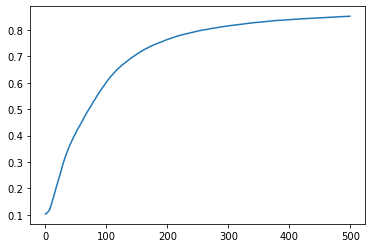

In [16]:
plt.plot(x,y)

I had created two arrays to store the values of the accuracy and iteration at each step and have plotted the graph above. We can see that the accuracy is trying to reach 100% and the rate of reaching is rapidly decreasing. We can increase the accuracy by using more iteration but it may overfit the training data hence will become a bad model. Also if you look closely the starting value of the grahp is not zero but around 0.1, this should be obvious as the the weights and bias are random values hence the probability of getting the label correct out of ten digits is 1/10=0.1.

Now we create two functions for getting the predicted labels for the training set by the first function and the second function will give the image and the predicted vaule together. Then we will try out the model for few labels and see the accuracy.

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


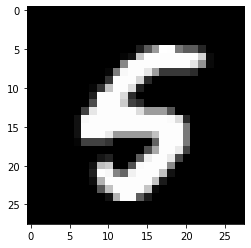

In [18]:
test_prediction(328, W1, b1, W2, b2)

Prediction:  [7]
Label:  2


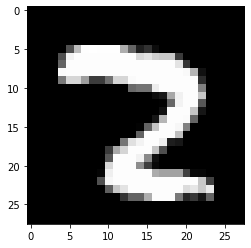

In [19]:
test_prediction(28, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


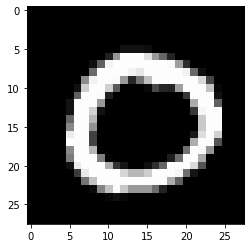

In [20]:
test_prediction(3328, W1, b1, W2, b2)

Prediction:  [0]
Label:  0


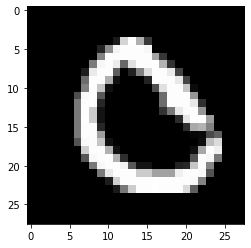

In [21]:
test_prediction(3128, W1, b1, W2, b2)

Now finally we check the accuracy of the testing set and see how our model performs for a foreign set.

In [22]:
data=pd.read_csv('mnist_test.csv')

In [23]:
data=np.array(data)
data=data.T
Y_test = data[0]
X_test = data[1:n]
X_test = X_test / 255.
prediction=make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(prediction, Y_test)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


0.8572

Wow! We got an accuracy of ~85% again. 


It was a pleasure talking to you guys and thank you for joining my ship for the whole trip along with this documentary notebook. I believe you must have understood the working of the neural network much better than before and hope you all continue learing more about machine learing and mathematics:)